# dev

In [45]:
from IPython import utils

import pandas as pd, numpy as np, seaborn as sns

import time, os, sys, re
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()


%autocall 1
%load_ext autoreload
# Set extension to reload modules every time before executing code
%autoreload 2

Automatic calling is: Smart
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
data_dir = nb_dir+'/Data/'
os.chdir(data_dir)

# look at southern plains data

In [84]:
df = pd.read_csv('south_plains_snow_data_large.csv')
# df.drop('Measurement')

In [85]:
#fraction of isnan values
# np.isnan(df['KS_SNOW_Means'].values).sum()/np.isnan(df['KS_SNOW_Means'].values).size
# np.isnan(df['TX_SNOW_Means'].values).sum()/np.isnan(df['KS_SNOW_Means'].values).size

# df.columns
# set(df.Measurement.values)

In [86]:
#aggregate different SNOW_Means columns into one
snow_means_cols = ['KS_SNOW_Means','TX_SNOW_Means','OK_SNOW_Means']
df['SNOW_Means'] = df[snow_means_cols[0]]
for col in snow_means_cols[1:]:
    df.loc[~np.isnan(df[col].values), 'SNOW_Means'] = df[col]
df['log_SNOW_Means'] = np.log(df['SNOW_Means'] ) 
print(f"number of missing SNOW_Means values is {np.isnan(df['SNOW_Means']).sum()}.")   
df2 =  df[['Year', 'dist_coast', 'elevation', 'latitude', 'longitude', 'log_SNOW_Means']]        

number of missing SNOW_Means values is 0.


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


In [ ]:
# df[['Year', 'dist_coast', 'elevation', 'latitude', 'longitude']].isnull().describe()

^Explanatory variables are non-nan.

In [53]:
#get ML data
# X_vals = df[['Year', 'dist_coast', 'elevation', 'latitude', 'longitude']].values
# y_vals = df['SNOW_Means'].values


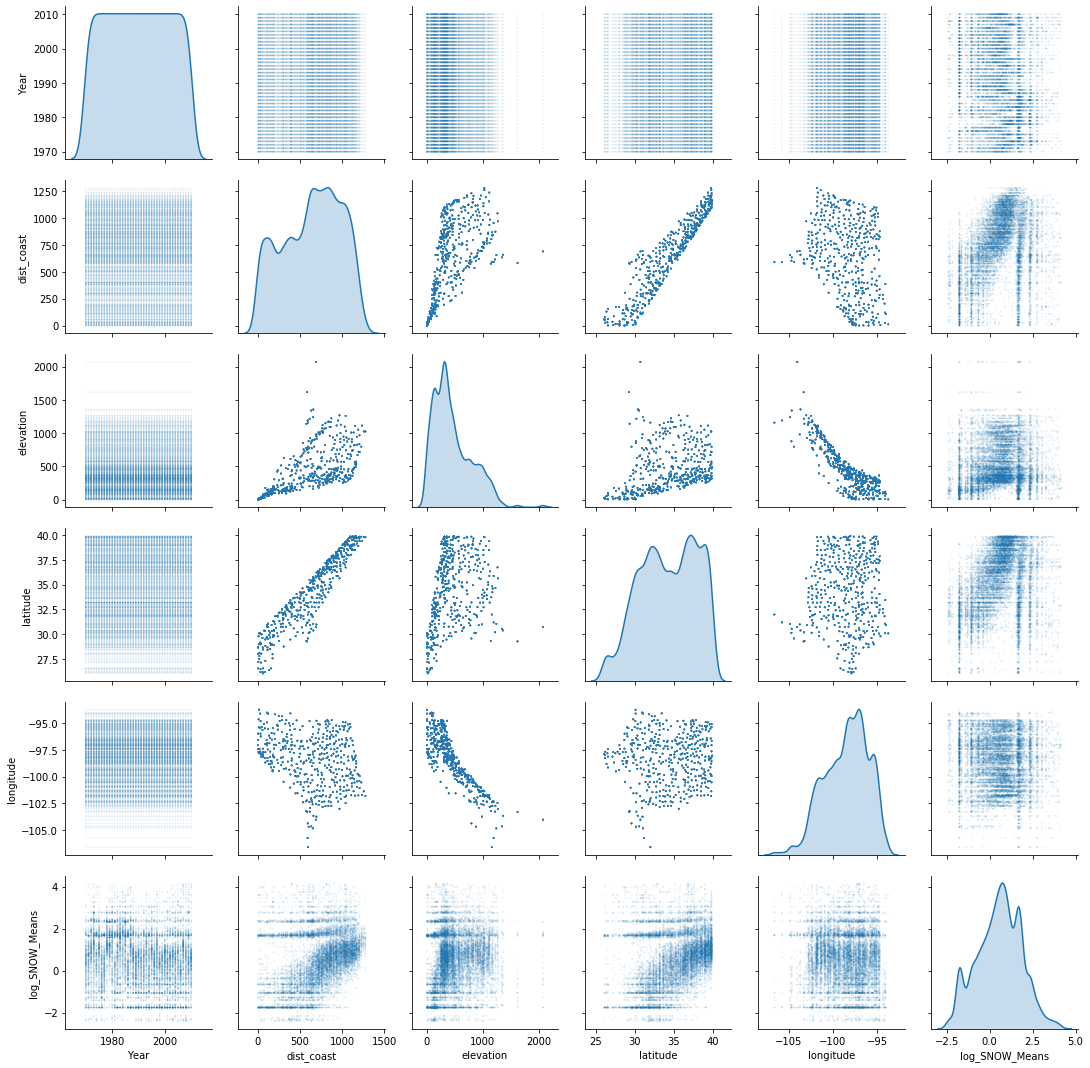

In [87]:
# sns.pairplot(
#     df[['Year', 'dist_coast', 'elevation', 'latitude', 'longitude', 'SNOW_Means']]
#     ,diag_kind='kde')

plot_kws={"s": 3, 'alpha':0.1, 'edgecolor':"none"}
g = sns.pairplot(
   df2
    ,diag_kind='kde',
    plot_kws=plot_kws)

# look at northern plains data

In [55]:
df = pd.read_csv('north_plains_snow_data_large.csv')
# df.drop('Measurement')

In [56]:
df.columns

Index(['Measurement', 'IA_SNOW_Means', 'MN_SNOW_Means', 'ND_SNOW_Means',
       'NE_SNOW_Means', 'SD_SNOW_Means', 'Station', 'Values', 'Year',
       'dist_coast', 'elevation', 'latitude', 'longitude', 'name', 'state'],
      dtype='object')

In [82]:
#aggregate different SNOW_Means columns into one
snow_means_cols = ['IA_SNOW_Means', 'MN_SNOW_Means', 'ND_SNOW_Means','NE_SNOW_Means', 'SD_SNOW_Means']
df['SNOW_Means'] = df[snow_means_cols[0]]
for col in snow_means_cols[1:]:
    df.loc[~np.isnan(df[col].values), 'SNOW_Means'] = df[col]
df['log_SNOW_Means'] = np.log(df['SNOW_Means'] ) 
print(f"number of missing SNOW_Means values is {np.isnan(df['SNOW_Means']).sum()}.")   
df2 =  df[['Year', 'dist_coast', 'elevation', 'latitude', 'longitude', 'log_SNOW_Means']]      

number of missing SNOW_Means values is 0.


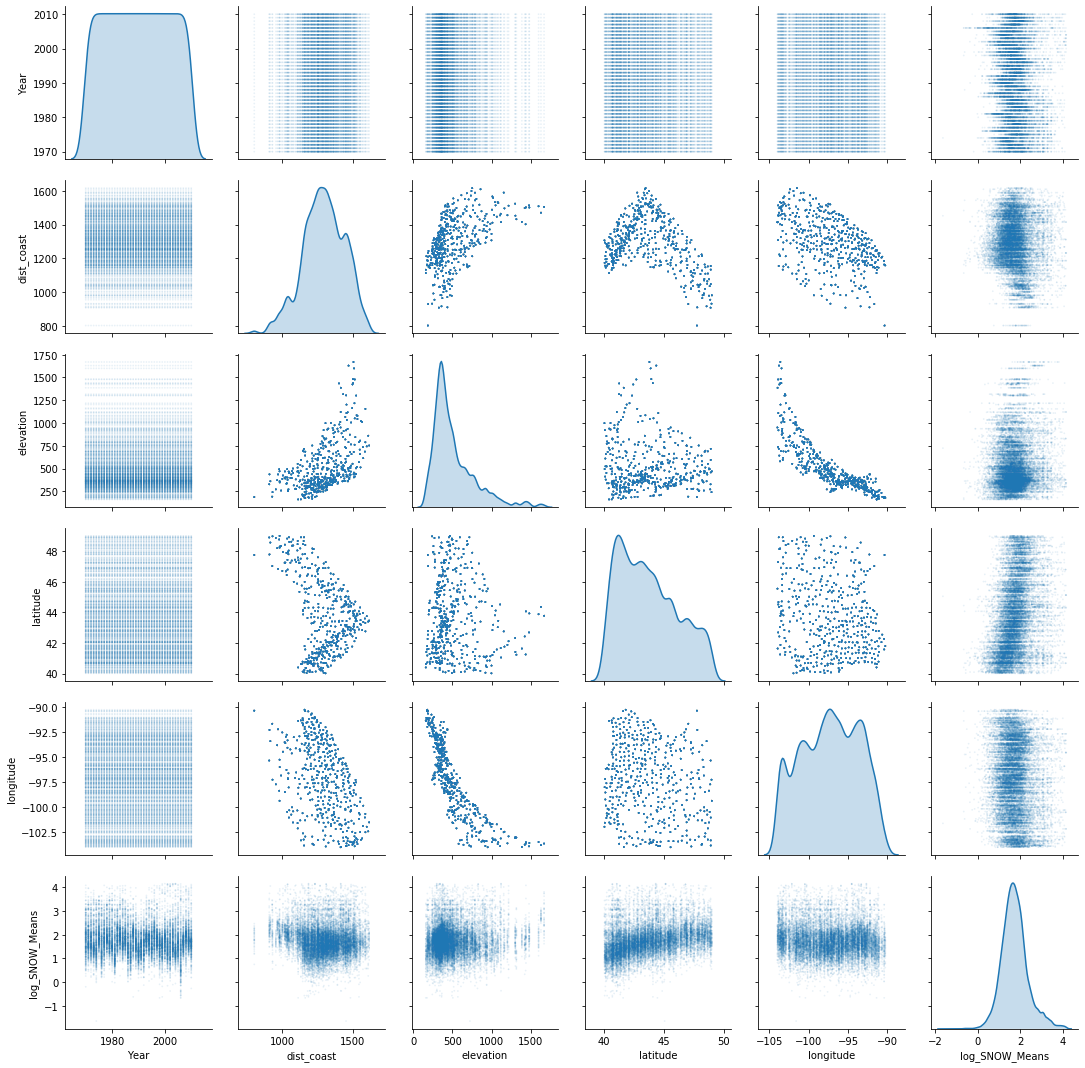

In [83]:
plot_kws={"s": 3, 'alpha':0.1, 'edgecolor':"none"}
g = sns.pairplot(
   df2
    ,diag_kind='kde',
    plot_kws=plot_kws)

In [65]:
# g = sns.PairGrid(df2)
# g.map_diag(sns.kdeplot)
# g.map_offdiag(sns.kdeplot, n_levels=6);

In [64]:
# sns.kdeplot?

In [71]:
sns.pairplot?